# Modelling the dynamics of Short Video Platforms

This notebook is for modeling the potential dynamics between users, content and the recommender system. 
Eventually we are interested in understanding the dynamics between the short video format, political communication and opinon dynamics. 
However, we start with a very simple model: 

### Model outline 

Our model consists of: 
- Videos
- Users
- Recommendation algorithm

#### Videos
Let denote the set of all video items availalbe at time t as $I_t$ with $i \in I_t$. 

**Assumptions**:
- set of videos is fixed over time
- Videos $>>$ Users
Further: 
- Type of video: One m types, in our case $m \in \{\text{non-political}, \text{political} \} $
- Catchniness of an video item: $\gamma \in [0,1]$: For now we don't assume a stronger functional form, but this might be even guided by several things such as a combination of quality and extremeness.. Also we assume for now that catchiness is unrelated to the content/topic/opinion of the video.
- $o_{i}^m$ denotes the opinion of a video in topic dimension m. For simplicity we assume that all non-political topics don't have a political opinion and vice-versa. The two topic opinion spaces exist independently.
- Thus the video conveys message $o_{i}^m$ with some _quality_  $\gamma_i$
- So far no

#### Users
Let denote $U$ the set of users with $u \in U$. For simplicity we assume that the set of users does not change over time.


User characteristics: 
- opinion $o_{u}^m $: Opinion/Taste of user u in dimension m 
- influenceability $\lambda_u \in [0,1]$ as in <cite id="tvpob"><a href="#zotero%7C13974174%2FMKK6YDCV">(Chavalarias et al., 2024)</a></cite>)


How do users interact with videos?
- According to some engagement probability 
$$ P(e) = \gamma_i (1-\lvert{o_{i}^m - o_{u}^m}\rvert) $$ 

- $\gamma_i$ denotes the _catchniness_, _engageability_ of video $i$
- Further we assume that the engagement probability decreases with difference in video opinion and 

The engagment probability is maximized when the engageability of a video (its quality, extremity) is maximal and the difference in opinions is minimal. 

#### Opinion Dynamics

We asume that all _non_political_opinions_ of users are fixed: 
$$ o_{u}^m(t+1) = o_{u}^m(t),  \text{for m} \neq 1$$ 

while the political opinions of users are updated by some opinion dynamic function. 
To start, we assume that function to have the same form as in <cite id="tvpob"><a href="#zotero%7C13974174%2FMKK6YDCV">(Chavalarias et al., 2024)</a></cite>): 

$$ o_{u}^{t+1} = o_{u}^t + \lambda_{u}(o_{i}^t - o_{u}^t) $$ 


where for each t the user considers all the political messages that they interacted with. 
Problem: Update every t or less frequently? 


#### Recommender Algorithms

Lets assume: 
- Too many videos for user to select, thus need for recommender to distribute videos to users

Assumption on the RecSys: 
- needs representation of content
- Through sophisticated ML algorithms, the RecSys is able to map the content into an opinion space, similar to the other opinions spaces. Let $r(i)$ denote the internal representation of item i, that we assume to be fixed over time: 
$$ r(i) = o_i + \epsilon $$ with $\epsilon \in \mathcal{N}(0, 0.5)$

We include $\epsilon$ as the recommender cannot fully estimate the opinion of the video. 
- Important Assumption that we can play around with



Then there is an reward if the user interacts with a video item. Further we can assume that are recommender is more likely to recommend a more popular video, i.e. one that is watched a lot. This lets us define a function how the recommender scores items:

$$ score(u, i) = \mu_{u,i}  \frac{pop_i}{\sum_{j=1}^{J} pop_{j}}$$ 


where $\mu_{u,i}$ determines the similarity between an item and the users position in the opinion space. 
The nice part is that the content similarity is driven by the interests of the user, while the popularity will be driven by the virality of an item. However, I introduced the paramter $\alpha$, as the popularity seemed to have been to strong, which led to most videos receiving little to none interactions, and other videos receiving a lot of interactions. Thus $\alpha$ controls the impact of popularity for the score


Some notes: 

- Its a no learning recommender algorithm, but this shape could easily integtrate:
    - Collaborative Filtering
    - Exploration Steps at every x t
- ML-Algorithms could be interesting in a further study

#### Implementation

- Time passes in discrete steps $t \in \{0,1,\dots, t\}$
- Each time step recommender will distribute videos to each user, until each user interacted with 5 videos.
    - Videos are ranked by the rec score for each user 
- Each user will interact with a video, if its interaction probability $P(e)$ is above a certain threshold
- Assume share of political videos $\theta$ to be $\frac{1}{2}$
- All parameters (opinions, opinions of video, $\lambda$, $\gamma$, etc) are initialized from uniform random

Then the algorithm works as follows: 
- Initialize RecSys:
    - Recommend random videos to each user until 5 interactions
- User Step:
    - Interact with videos according to $P(e)$
    - Update Political Opinions
- Recommendation Starts: for every timestep:
    - Calculate User Position
    - Score all videos for each user
    - Recommended videos until 5 interactions
    - User Step (as above) 


#### Comments: 

- Users:
    - Interaction Probability: Now probability with:
$$
P(X = k) = p^k (1-p)^{1-k} \quad \text{for } k \in \{0, 1\}
$$
- RecSys:
    - Strong Memory might drive below results: Older interactions for each user equally important to newer interactions: **Solution**: Each timestep decay interactions with $\theta$, so that the weight of older interactions increases steadily. For starters assume $\theta = 0.5$ 
    - Rewachting videos: atm there is nothing that prevents the RecSys to recommend the same item to the same user multiple times. This could be an easy fix
    - Exploration vs. Exploitation phases


#### Further considerations: 

What happens if there is a relationship between catchiness and extreme political opinions? How will this drive the whole system? 

### Code Implementation

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

### Pseudo Code

In [3]:
# initialize simulation parameters
video_parameters =  {
    "opinion": video_opinions,
    "gamma": video_catchy,
    "political": political
}

user_parameters = {
    "opinion": user_opinions,
    "lambda": influencable
}

recommender_parameters = {
    "content_representation": rec_representation
}



class User(Video):
    def __init__(self, user_parameters):
        pass

    def opinion_update(self):
        """ 
        Some function that transforms considered opinions, current user opinion and 
        lambda to new opinion of each user
        """
        pass


class RecommenderSystem(Users):
    def __init__(self, user_parameters, video_parameters, recommender_parameters):
        super().__init__()
        pass

    def initialize_system(self):
        """
        A function that initializes the system with a random recommendation strategy
        to all users
        """
        pass
    
    def get_popularity(self):
        """
        A function that returns the relative popularity of an item, based on interactions
        """
        pass 
        
    def get_user_position(self):
        """
        A function that calculates the user position in each dimension, 
        given the previous interactions with recommended items
        """
        pass

    def get_similarity(self):
        """ 
        A function that calculates the similarity between user positions and the content representation of 
        each item
        """
        self.parameters["similarity"] = self.parameters["content_representation"] - self.parameters["user_position"]

    def get_rec_score(self):
        self.parameters["rec_score"] = self.parameters["similarity"] * self.get_popularity()

    def recommender_step(self):
        self.get_user_position()
        self.get_similarity()
        self.get_rec_score()

    def interactions(self):
        """
        A function that ranks n (or all) items based on the rec score and 
        shows them to users until they interact with x items and updates the current
        interactions
        """
        pass
        
    def recommended_opinions(self):
        """
        A function to get the mean of the considered opinions for each user
        """
        pass
        
    def user_step(self):
        
        self.interaction()
        self.recommended_opinions()
        self.opinion_update()

        
    def run_simulation(self, t=50):
        
        opinions = [self.user_parameters["opinion"]]
        self.initialize_system()
        self.user_step()
        opinions.append(self.user_parameters["opinion"])
        for _ in range(t):
            self.rec_step()
            self.user_step()
            opinions.append(self.user_parameters["opinion"])
    
        return opinions
        
    


SyntaxError: incomplete input (4152222465.py, line 43)

In [16]:
import numpy as np
from src.model import RecSyS
n_videos = 10000
n_users = 1000 #or more I will playaround
jesus = np.random.choice([0,1], n_videos)
#video_opinions = np.random.uniform(0, 0.1, n_videos) * jesus + ((1 - jesus) * np.random.uniform(0.9, 1, n_videos))
video_opinions = np.random.uniform(0, 1, n_videos)
video_catchy = np.random.uniform(0, 1, n_videos)
political = np.random.choice([0,1], n_videos)
user_opinions = np.random.uniform(0,1, n_users)
influencable = np.random.uniform(0, 1, n_users)
rec_error = np.random.normal(0, 0.0001, n_videos) #hmmm
rec_repres = video_opinions #+ rec_error
video_params = {
    "opinion": video_opinions,
    "gamma": video_catchy,
    "political": political
}

user_params = {
    "opinion": user_opinions,
    "lambda": influencable
}


rec_sys = {
    "content_representation": rec_repres
}

In [17]:
SimpleModel= RecSyS(rec_parameters=rec_sys, user_parameters=user_params, video_parameters=video_params, n_agents=n_users, n_videos=n_videos) #fill in
#simulated_opinions = SimpleModel.run_simulation()
simulated_opinions = SimpleModel.better_simulation(t=100)

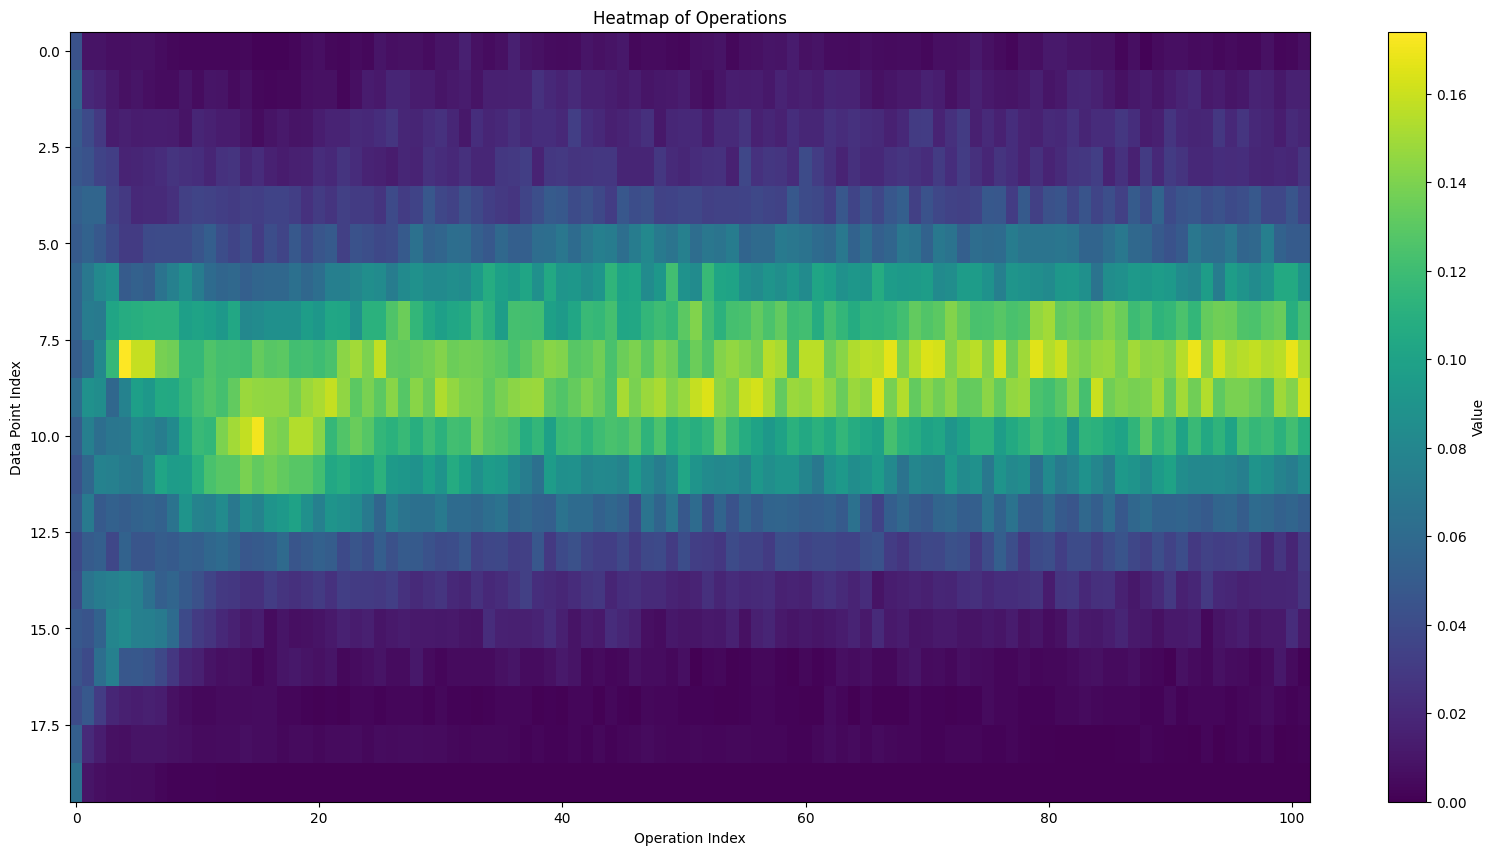

In [18]:
from src.opinion_dynamics import plot_opinions
plot_opinions(np.stack(simulated_opinions).T)

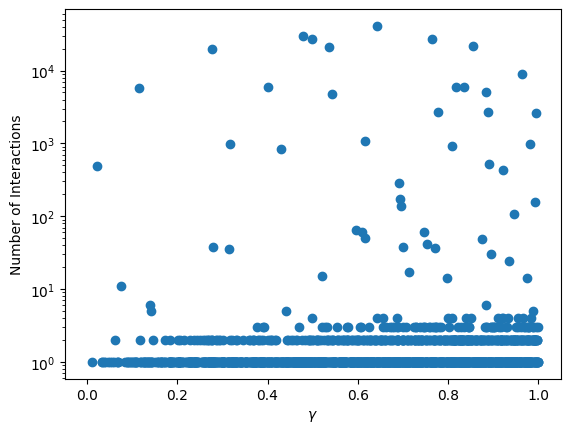

In [19]:
interactions = SimpleModel.get_attributes()
interact_count = interactions.sum(axis=0)
import matplotlib.pyplot as plt
plt.scatter(video_catchy[political==1], interact_count[political==1])
plt.xlabel('$\gamma$')
plt.ylabel('Number of Interactions')
plt.yscale('log')
#plt.ylim(0,50)
plt.show()

In [20]:
import pandas as pd
df_dict = {
    "catchy": video_catchy,
    "opinion": video_opinions,
    "interactions": interact_count,
    "political": political
}
df = pd.DataFrame(df_dict)
political_df = df[df.political == 1]

Lets also try to understand the differences of interactions between political and non political videos

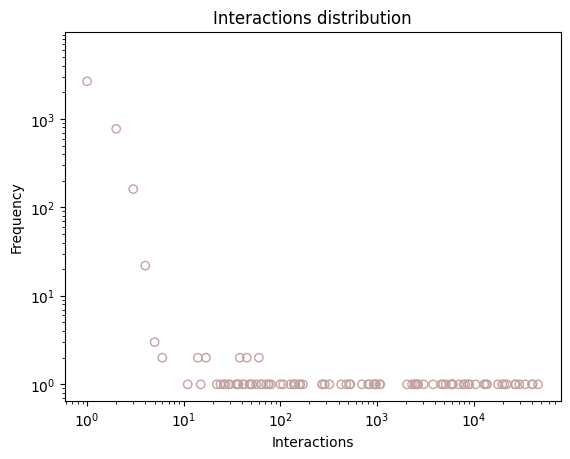

In [21]:
hist = df['interactions'].value_counts().sort_index()
newman_color = "#c3a3a1"
plt.scatter(hist.index, hist.values, facecolors='none', edgecolors=newman_color,label = 'Data') 
plt.loglog()
plt.xlabel('Interactions')
plt.ylabel('Frequency')
plt.title('Interactions distribution')
plt.show()

In [22]:
political_df['catchy_bin'] = pd.cut(political_df['catchy'], bins=20)
political_df['opinion_bin'] = pd.cut(political_df['opinion'], bins=20)
political_df['mean_catchy_bin'] = political_df['catchy_bin'].apply(lambda x: x.mid)
political_df['mean_opinion_bin'] = political_df['opinion_bin'].apply(lambda x: x.mid)
political_df = political_df.round(3)
pivot_table = political_df.groupby(['mean_catchy_bin', 'mean_opinion_bin']).interactions.mean().unstack()

/tmp/ipykernel_840/1202444636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['catchy_bin'] = pd.cut(political_df['catchy'], bins=20)
/tmp/ipykernel_840/1202444636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['opinion_bin'] = pd.cut(political_df['opinion'], bins=20)
/tmp/ipykernel_840/1202444636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [23]:
pivot_table.fillna(0, inplace=True)

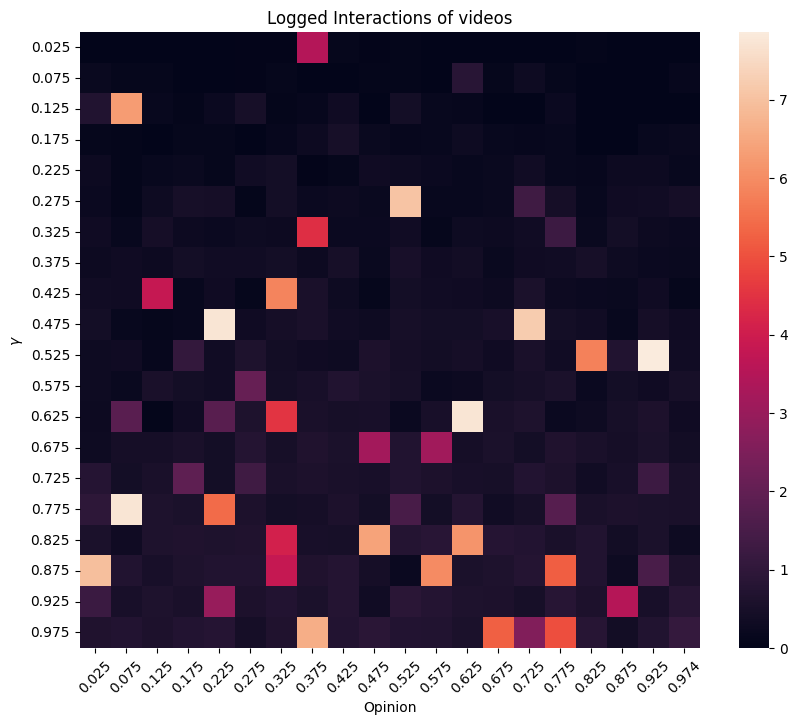

In [25]:
import seaborn as sns
pivot_table_log = np.log(pivot_table + 1) 
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_log)
plt.title('Logged Interactions of videos')
plt.xlabel('Opinion')
plt.ylabel('$\gamma$')
plt.xticks(np.arange(0.5, len(pivot_table_log.columns)), [f'{val:.3f}' for val in pivot_table_log.columns], rotation=45)
plt.yticks(np.arange(0.5, len(pivot_table_log.index)), [f'{val:.3f}' for val in pivot_table_log.index], rotation=0)
plt.show()

Problems: 
- Can users rewatch a video? As of now yes, but this needs more considerations.
- If a users never gets a political recommendation, or another recommendation, we have a strange position of the user at the extremes, I don't see this rn, but we should recheck
- Seems now that the initial random conditions are driving the whole outcome of the model